# Coletar dados de todas as questões

In [8]:
import os
import json

# Define dictionaries to store metrics
metrics = {
    'few_sol': {
        'solutions': [],
        'clusters': [],
        'overcode_times': [],
        'overall_times': []
    },
    'many_sol': {
        'solutions': [],
        'clusters': [],
        'overcode_times': [],
        'overall_times': []
    },
    'all_sol': {
        'solutions': [],
        'clusters': [],
        'overcode_times': [],
        'overall_times': []
    }
}

# Define the directory path
data_dir = 'problems_data/'

# Iterate through subdirectories in problems_data
for problem_id_folder in os.listdir(data_dir):
    problem_id_path = os.path.join(data_dir, problem_id_folder)
    
    # Check if it's a directory and if it contains an 'output' folder
    if os.path.isdir(problem_id_path) and 'output' in os.listdir(problem_id_path):
        output_dir = os.path.join(problem_id_path, 'output')
        
        # Check if 'execution_times.json' exists
        execution_times_file = os.path.join(output_dir, 'execution_times.json')
        solutions_file = os.path.join(output_dir, 'solutions.json')
        if os.path.exists(execution_times_file) and os.path.exists(solutions_file):

            with open(execution_times_file, 'r') as f:
                execution_times_data = json.load(f)

            with open(solutions_file, 'r') as f:
                solutions_data = json.load(f)
                
            # Get the number of clusters
            num_clusters = len(solutions_data)
            
            # Get the values of 'overcode_time' and 'master_script_time'
            overcode_time = execution_times_data['overcode_time']
            master_script_time = execution_times_data['master_script_time']
                    
            # Calculate the number of solutions
            num_solutions = sum(item['count'] for item in solutions_data)
            
            # Determine which category to append to based on the number of solutions
            category = 'few_sol' if num_solutions <= 50 else 'many_sol'
            
            # Append metrics to the corresponding category
            metrics[category]['solutions'].append(num_solutions)
            metrics[category]['clusters'].append(num_clusters)
            metrics[category]['overcode_times'].append(overcode_time)
            metrics[category]['overall_times'].append(master_script_time)

# Append all metrics to the 'all_sol' category
metrics['all_sol']['solutions'] = metrics['few_sol']['solutions'] + metrics['many_sol']['solutions']
metrics['all_sol']['clusters'] = metrics['few_sol']['clusters'] + metrics['many_sol']['clusters']
metrics['all_sol']['overcode_times'] = metrics['few_sol']['overcode_times'] + metrics['many_sol']['overcode_times']
metrics['all_sol']['overall_times'] = metrics['few_sol']['overall_times'] + metrics['many_sol']['overall_times']


## Transformar em Séries do Pandas

In [9]:
import pandas as pd

for category in metrics:
    for metric in metrics[category]:
        metrics[category][metric] = pd.Series(metrics[category][metric])

# Agregar os dados

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Questões de cada tipo

In [11]:
few_sol_count = len(metrics['few_sol']['solutions'])
many_sol_count = len(metrics['many_sol']['solutions'])
total_sol_count = len(metrics['all_sol']['solutions'])

print(f'Number of problems with few solutions: {few_sol_count}')
print(f'Number of problems with many solutions: {many_sol_count}')
print(f'Total number of problems: {total_sol_count}')

Number of problems with few solutions: 52
Number of problems with many solutions: 17
Total number of problems: 69


## Função para exibir gráficos

In [6]:
def generate_plots(box_data, xticklabels, ylabel):
    """
    Generate box and violin plots for the given data.

    Args:
        box_data (list): Data for the box and violin plots.
        xticklabels (list): Labels for the x-axis ticks.
        ylabel (str): Label for the y-axis.

    Returns:
        None
    """
    # Data for violin plot
    violin_data = [box_data]

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))

    # Box plot with outliers
    axes[0].boxplot(box_data, showfliers=True)
    axes[0].set_title('Box Plot (Showing Outliers)')
    axes[0].set_xticklabels(xticklabels)
    axes[0].set_ylabel(ylabel)

    # Box plot without outliers
    axes[1].boxplot(box_data, showfliers=False)
    axes[1].set_title('Box Plot (Not Showing Outliers)')
    axes[1].set_xticklabels(xticklabels)
    axes[1].set_ylabel(ylabel)

    # Violin plot
    axes[2].violinplot(violin_data, showmedians=True)
    axes[2].set_title('Violin Plot')
    axes[2].set_xticks([1])
    axes[2].set_xticklabels(xticklabels)
    axes[2].set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()

# Example usage:
# generate_plots(box_data, ['Few solutions'], 'Overcode Time')


## Tempos de Execução

### Gráfico de Dispersão: Tempo X Número de Soluções

#### Tempo do Overcode

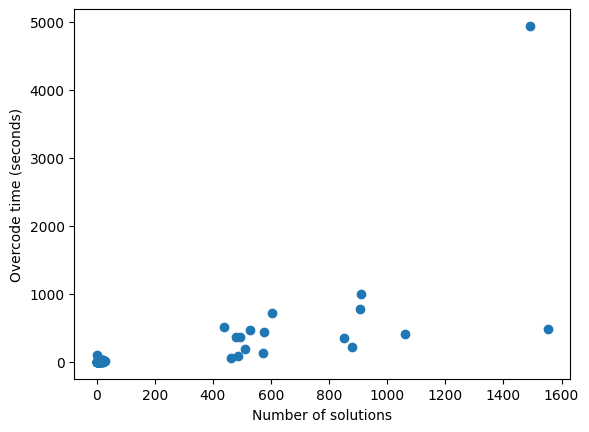

In [83]:
plt.plot(metrics['all_sol']['solutions'], metrics['all_sol']['overcode_times'], 'o')
plt.xlabel('Number of solutions')
plt.ylabel('Overcode time (seconds)')
plt.show()

#### Tempo Geral

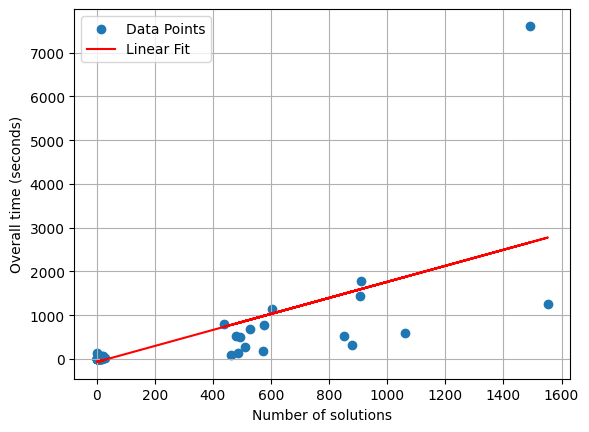

In [84]:
# Fit a linear regression line
coefficients = np.polyfit(metrics['all_sol']['solutions'], metrics['all_sol']['overall_times'], 1)
slope, intercept = coefficients

plt.scatter(metrics['all_sol']['solutions'], metrics['all_sol']['overall_times'], label='Data Points')
plt.plot(metrics['all_sol']['solutions'], slope * metrics['all_sol']['solutions'] + intercept, color='red', label='Linear Fit')

plt.xlabel('Number of solutions')
plt.ylabel('Overall time (seconds)')
plt.legend()

plt.grid(True)
plt.show()

### Tempo do Overcode para Todas as Soluções

#### Estatísticas

In [85]:
metrics['all_sol']['overcode_times'].describe()

count      69.000000
mean      172.259356
std       618.960073
min         0.123796
25%         0.701822
50%         3.519754
75%        61.878445
max      4937.495380
dtype: float64

#### Gráficos

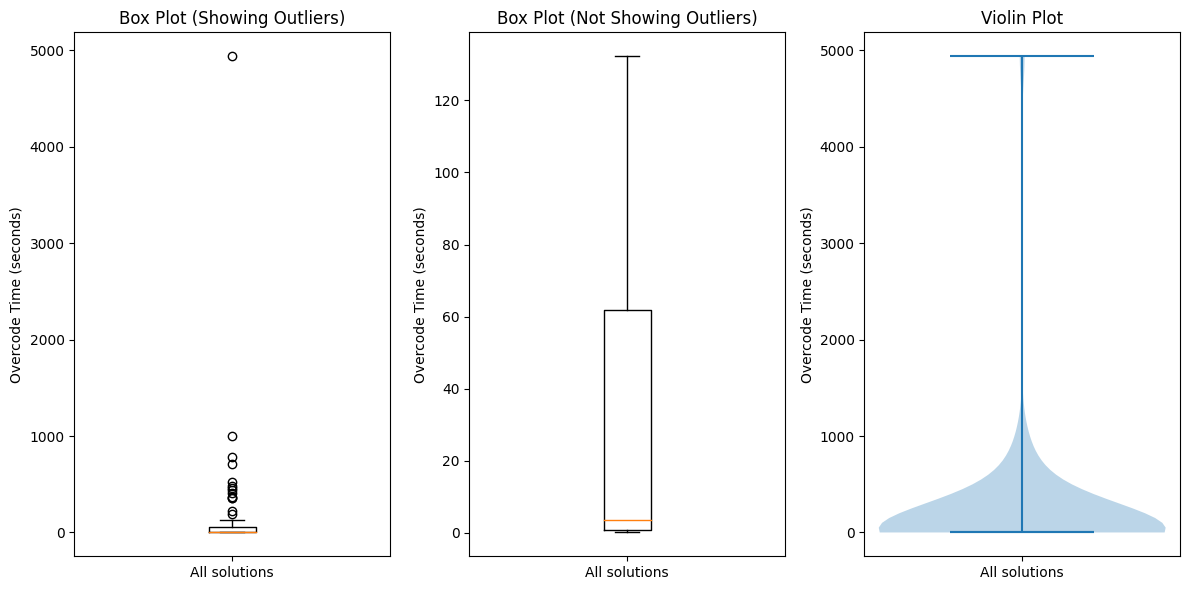

In [19]:
generate_plots(metrics['all_sol']['overcode_times'], ['All solutions'], 'Overcode Time (seconds)')

### Tempo do Overcode para Poucas Soluções

#### Estatísticas

In [21]:
metrics['few_sol']['overcode_times'].describe()

count    52.000000
mean      6.666938
std      14.842569
min       0.123796
25%       0.538850
50%       1.154519
75%       6.004341
max      98.314331
dtype: float64

#### Gráficos

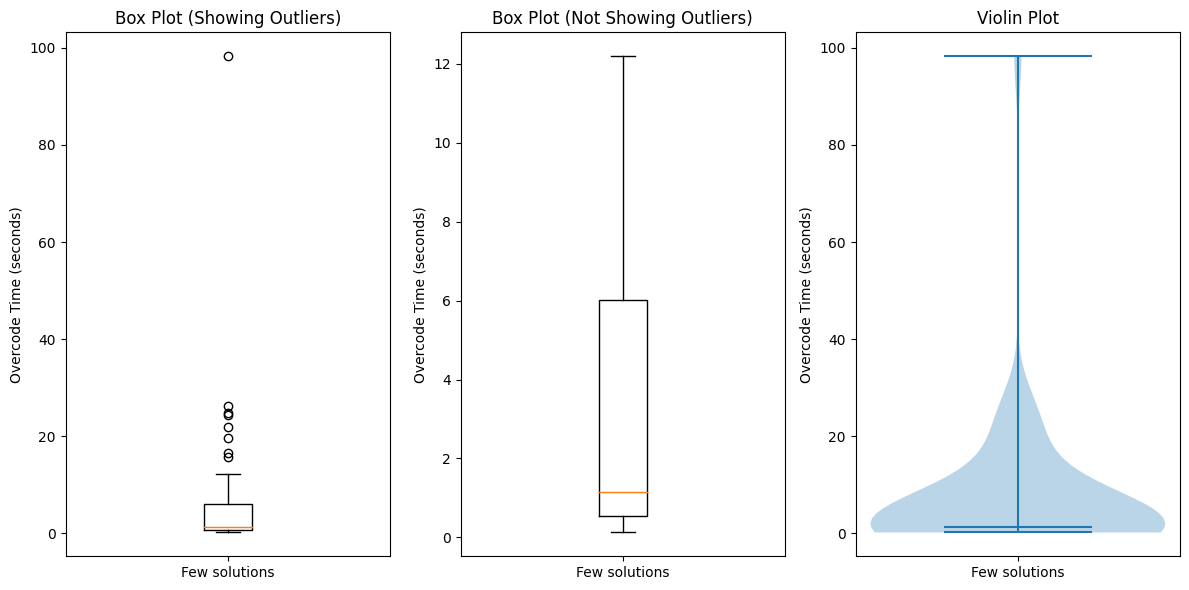

In [22]:
generate_plots(metrics['few_sol']['overcode_times'], ['Few solutions'], 'Overcode Time (seconds)')


### Tempo do Overcode para Muitas Soluções

#### Estatísticas

In [23]:
metrics['many_sol']['overcode_times'].describe()

count      17.000000
mean      678.777343
std      1125.081645
min        61.878445
25%       225.590828
50%       405.392898
75%       518.561705
max      4937.495380
dtype: float64

#### Gráficos

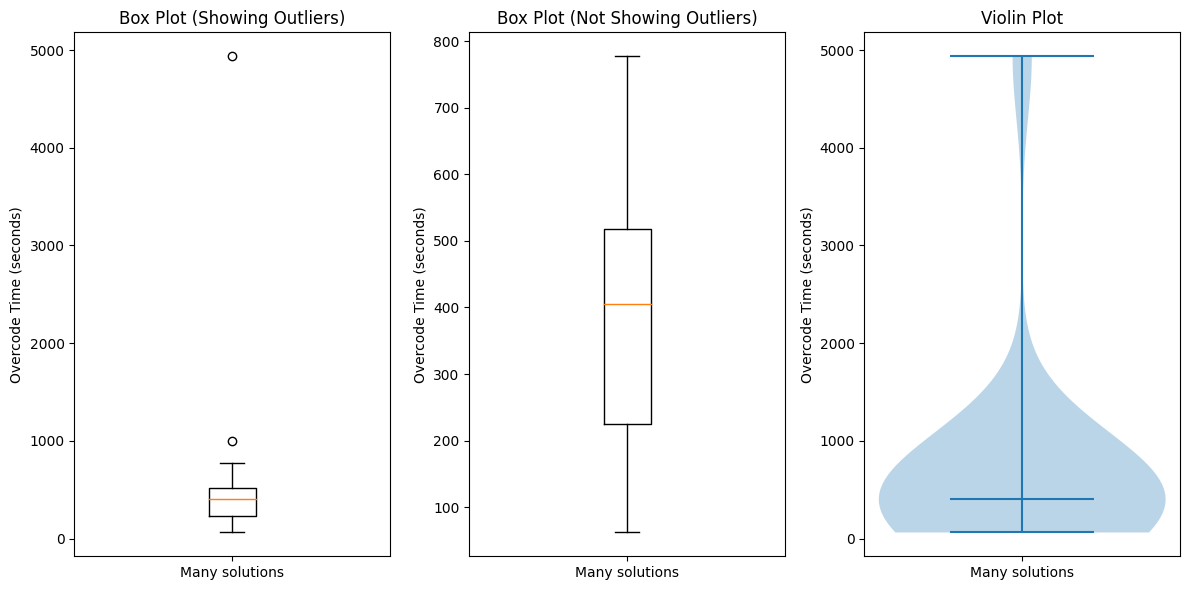

In [24]:
generate_plots(metrics['many_sol']['overcode_times'], ['Many solutions'], 'Overcode Time (seconds)')

### Tempo Geral para Todas as Soluções

#### Estatísticas

In [42]:
metrics['all_sol']['overall_times'].describe()

count      69.000000
mean      282.617759
std       968.234641
min         0.317683
25%         2.615594
50%        12.916145
75%        88.643589
max      7611.744969
dtype: float64

#### Gráficos

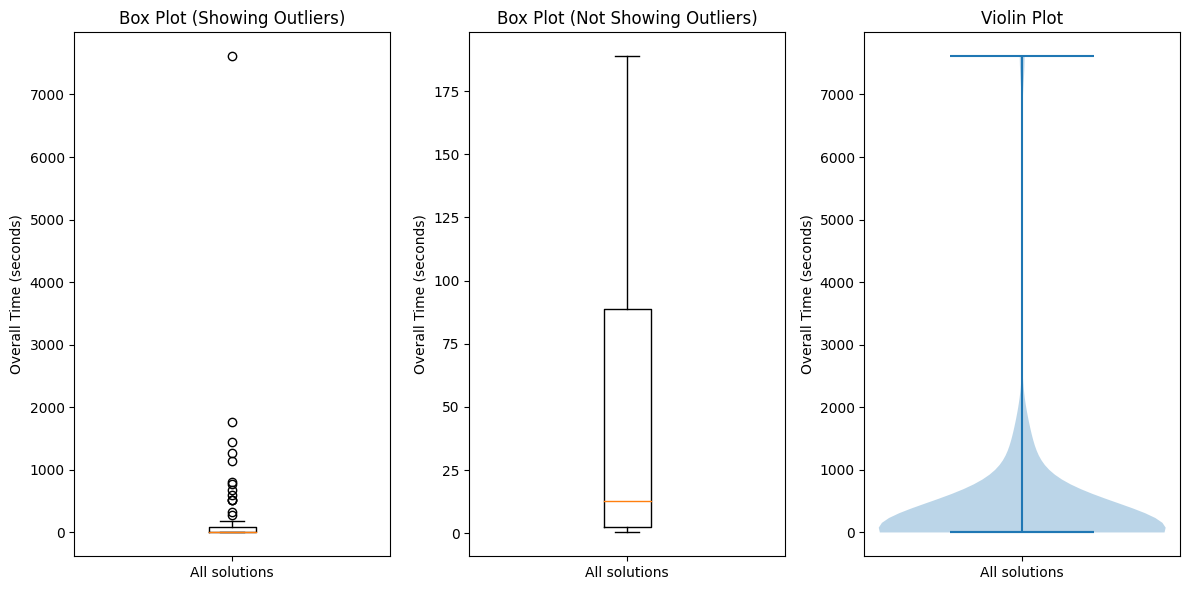

In [26]:
generate_plots(metrics['all_sol']['overall_times'], ['All solutions'], 'Overall Time (seconds)')

### Tempo Geral para Poucas Soluções

#### Estatísticas

In [27]:
metrics['few_sol']['overall_times'].describe()

count     52.000000
mean      15.763689
std       24.373969
min        0.317683
25%        2.379940
50%        4.308152
75%       20.739724
max      133.038839
dtype: float64

#### Gráficos

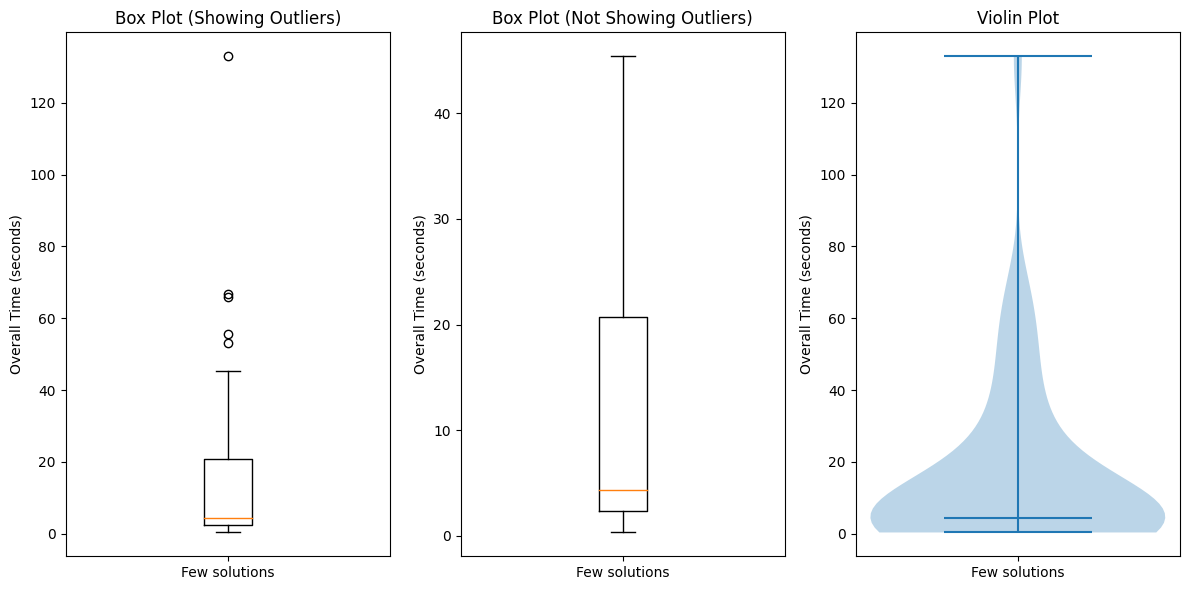

In [28]:
generate_plots(metrics['few_sol']['overall_times'], ['Few solutions'], 'Overall Time (seconds)')

### Tempo Geral para Muitas Soluções

#### Estatísticas

In [29]:
metrics['many_sol']['overall_times'].describe()

count      17.000000
mean     1098.877267
std      1744.428582
min        88.643589
25%       322.358351
50%       591.127459
75%      1146.595840
max      7611.744969
dtype: float64

#### Gráficos

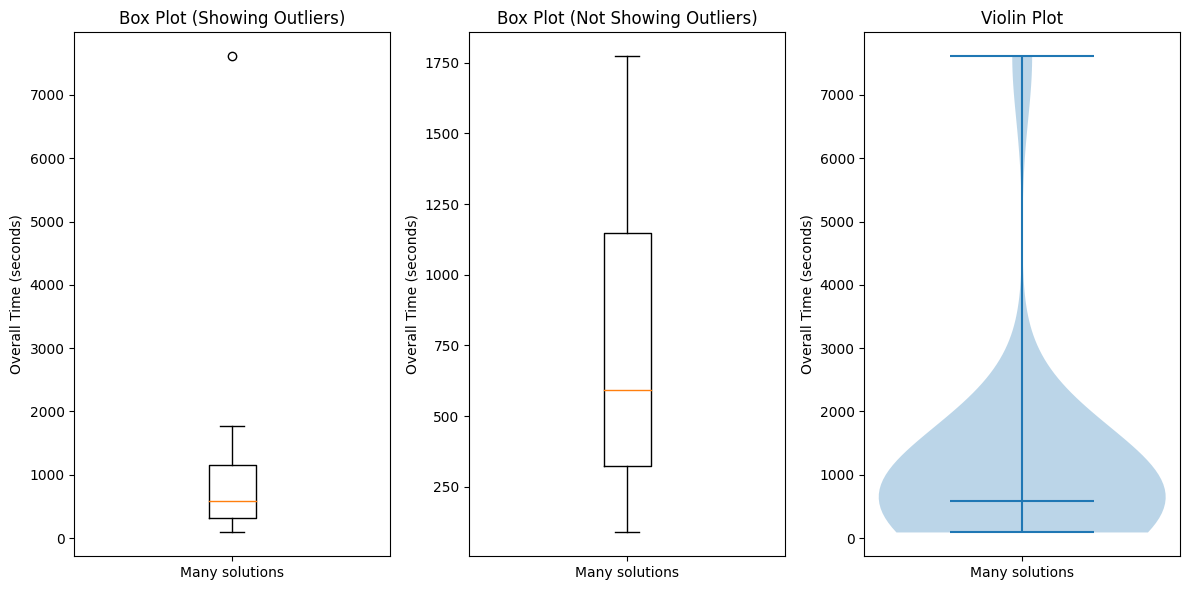

In [30]:
generate_plots(metrics['many_sol']['overall_times'], ['Many solutions'], 'Overall Time (seconds)')

## Número de Clusteres e Soluções

In [31]:
few_sol_percentages = metrics['few_sol']['clusters'] / metrics['few_sol']['solutions']
many_sol_percentages = metrics['many_sol']['clusters'] / metrics['many_sol']['solutions']
all_sol_percentages = metrics['all_sol']['clusters'] / metrics['all_sol']['solutions']

### Todas as Questões

In [34]:
print(f'Using Overcode, the number of programs is reduced to {round(all_sol_percentages.mean(), 4) * 100}% of the original number of programs (all solutions)')

Using Overcode, the number of programs is reduced to 83.19% of the original number of programs (all solutions)


#### Estatísticas

In [36]:
all_sol_percentages.describe()

count    69.000000
mean      0.831859
std       0.212863
min       0.192531
25%       0.713502
50%       0.954545
75%       1.000000
max       1.000000
dtype: float64

#### Gráficos

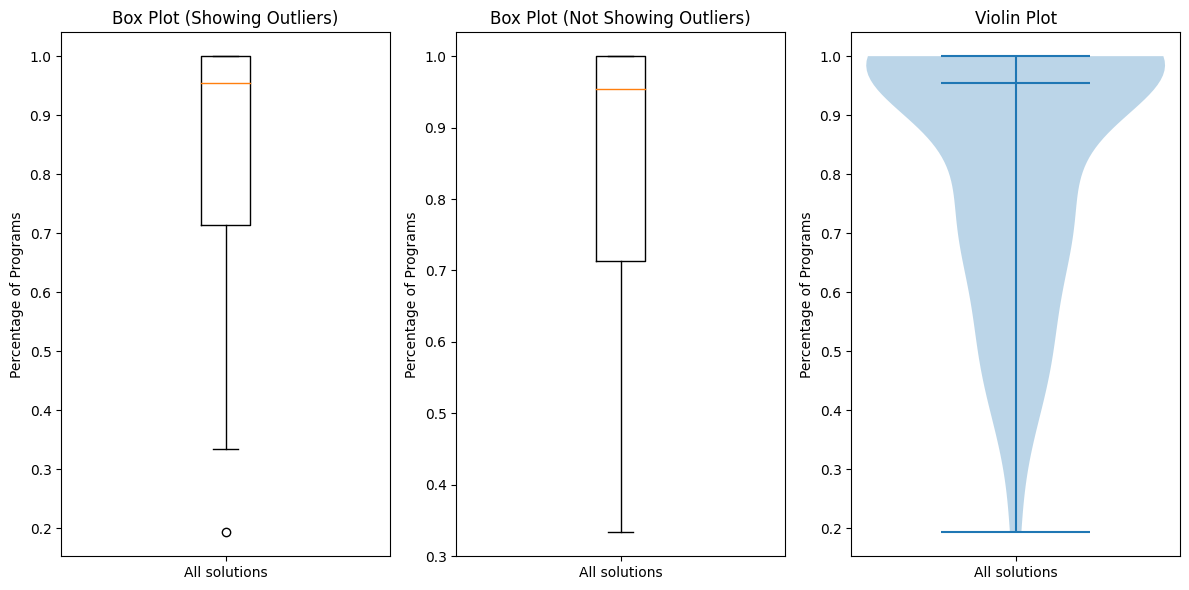

In [37]:
generate_plots(all_sol_percentages, ['All solutions'], 'Percentage of Programs')

### Questões com Poucas Soluções

In [35]:
print(f'Using Overcode, the number of programs is reduced to {round(few_sol_percentages.mean(), 4) * 100}% of the original number of programs (few solutions)')

Using Overcode, the number of programs is reduced to 90.08% of the original number of programs (few solutions)


#### Estatísticas

In [38]:
few_sol_percentages.describe()

count    52.000000
mean      0.900847
std       0.176735
min       0.333333
25%       0.853383
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64

#### Gráficos

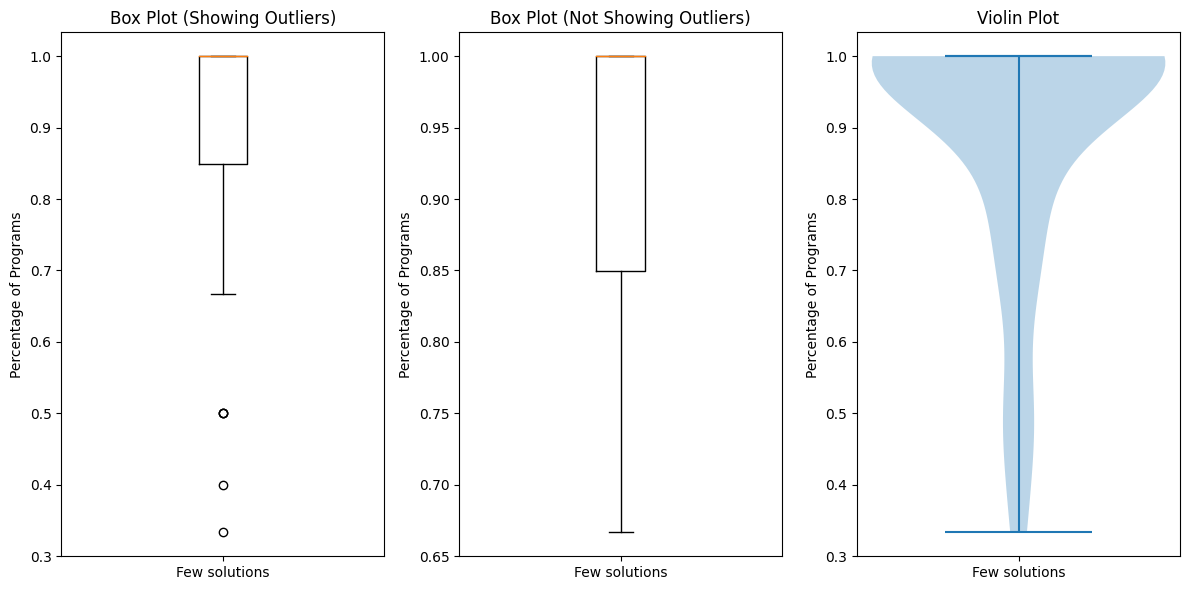

In [106]:
generate_plots(few_sol_percentages, ['Few solutions'], 'Percentage of Programs')

### Questões com Muitas Soluções

In [39]:
print(f'Using Overcode, the number of programs is reduced to {round(many_sol_percentages.mean(), 4) * 100}% of the original number of programs (many solutions)')

Using Overcode, the number of programs is reduced to 62.08% of the original number of programs (many solutions)


#### Estatísticas

In [40]:
many_sol_percentages.describe()

count    17.000000
mean      0.620838
std       0.173860
min       0.192531
25%       0.550699
50%       0.656428
75%       0.723478
max       0.894523
dtype: float64

#### Gráficos

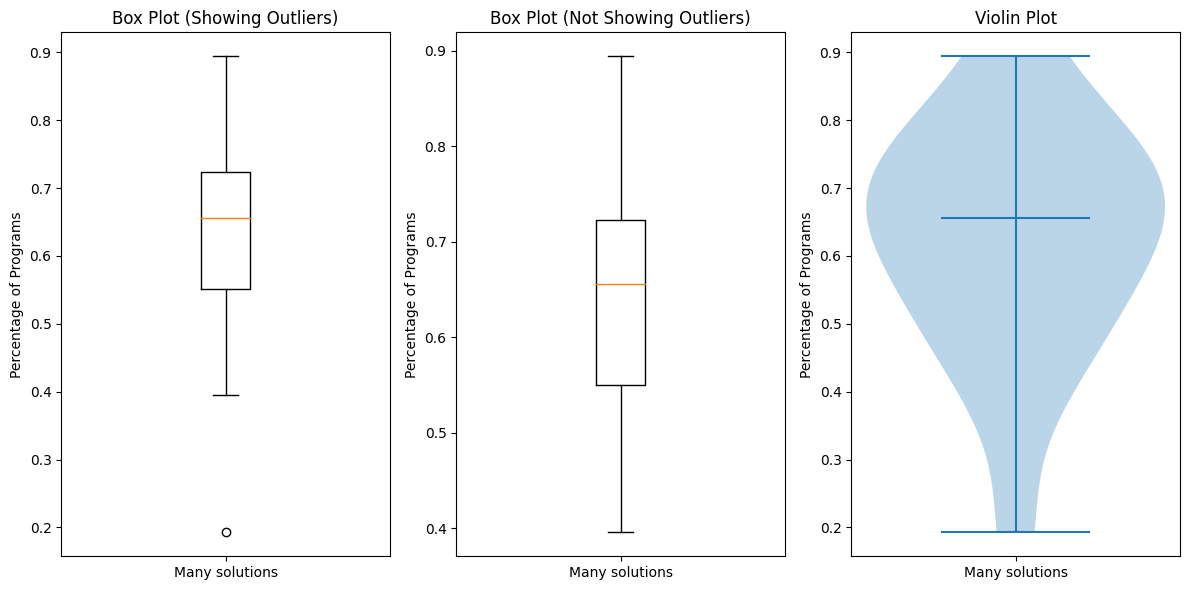

In [41]:
generate_plots(many_sol_percentages, ['Many solutions'], 'Percentage of Programs')